# Import template 

In [15]:
%run Template.ipynb

In [16]:
isCollab = False
pathLogMel = "npy/"
pathDriveSaveFile = "models_save/"

if isCollab:
    pathLogMel = "/content/drive/MyDrive/Datascience projet son/LogMel/"
    pathDriveSaveFile = "/content/drive/MyDrive/Datascience projet son/You/Auto_save_AE_"

# Definition Path Fichier & Variable

In [9]:
#chargement des modèles pré-entrainés
# autoencoder3D = keras.models.load_model("autoencoder3D_0506_fan_256dt_600E.joblib")
# autoencoderV2=keras.models.load_model("AE_V2.joblib")
# AE_DENSE_JAP=keras.models.load_model("AE_DENSE_JAP_427_320.joblib")
AE_slider=keras.models.load_model("Auto_save_AE_slider.hdf5")

OSError: SavedModel file does not exist at: Auto_save_AE_slider.hdf5/{saved_model.pbtxt|saved_model.pb}

In [17]:
# IMPORT DES FICHIERS

dt=256
freq=256
normal_val=0
anomaly_val=1

machine='fan'

In [18]:
#Sélection des données
df_machine = df[ df['Machine']== machine ] # sélection de la machine fan
df_machine_train = df_machine[df_machine['train_test'] == 'train'] # sélection du dataset train
df_machine_test = df_machine[df_machine['train_test'] == 'test']

y_train_ID = np.array(df_machine_train['Machine_ID'])
y_test_ID = np.array(df_machine_test['Machine_ID'])
y_test_son = np.array(df_machine_test['son_type'])

y_train_ID=y_train_ID/2
y_train_ID=y_train_ID.astype('int')
y_train_ID_dum=pd.get_dummies(y_train_ID)
y_test_ID=y_test_ID/2
y_test_ID=y_test_ID.astype('int')
y_test_ID_dum=pd.get_dummies(y_test_ID)

In [19]:
#load data whith librosa

X_train = load_data(df_machine_train['URL'], dt=dt, normalize=True)
X_test = load_data(df_machine_test['URL'], dt=dt, normalize=True)

  0%|          | 0/3675 [00:00<?, ?it/s]C:\Users\Corentin\AppData\Roaming\Python\Python38\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(
  3%|▎         | 93/3675 [00:02<01:22, 43.22it/s]


KeyboardInterrupt: 

In [20]:
#Load data from prefromated npy files
#liens chargement enregistrement 
path_train = pathLogMel+machine+'_train_norm_'+str(dt)+'_'+str(freq)+'.npy' 
path_test = pathLogMel+machine+'_test_norm_'+str(dt)+'_'+str(freq)+'.npy'
#importation des fichiers npy
X_train = np.load(path_train)
X_test = np.load(path_test)

#reshaping
X_train = X_train.reshape(-1,dt,freq)
X_test = X_test.reshape(-1,dt,freq)

In [21]:
type(X_train)

numpy.ndarray

# CLASSIFICATION RNN

In [23]:
#Modèle GRU + batch -AE
#Modèle rapide et fonctionnel sur Slider


from keras.layers import Dense, BatchNormalization,Activation,Reshape

nb_classe = y_test_dum.shape[1]

#on ajoute l'ancien modèle
Classificateur_GRU64 = Sequential()

Classificateur_GRU64.add(tf.keras.layers.GRU(64, return_sequences=True, input_shape=(256,256)))
Classificateur_GRU64.add(tf.keras.layers.BatchNormalization())
Classificateur_GRU64.add(LeakyReLU())

Classificateur_GRU64.add(tf.keras.layers.GRU(64))
Classificateur_GRU64.add(tf.keras.layers.BatchNormalization())
Classificateur_GRU64.add(LeakyReLU())

Classificateur_GRU64.add(Dense(64))
Classificateur_GRU64.add(Dropout(0.2))
Classificateur_GRU64.add(LeakyReLU())

Classificateur_GRU64.add(Dense(nb_classe, activation='softmax'))
Classificateur_GRU64.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 256, 64)           61824     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256, 64)           256       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 256, 64)           0         
_________________________________________________________________
gru_7 (GRU)                  (None, 64)                24960     
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [22]:
#Modèle GRU + batch -AE
#Modèle plus poussé long au calcul (200s / EPOCH)

#on ajoute l'ancien modèle
Classificateur_GRU64 = Sequential()

Classificateur_GRU64.add(tf.keras.layers.GRU(64, input_shape=(256,256), return_sequences=True,recurrent_dropout=0.2))
Classificateur_GRU64.add(tf.keras.layers.BatchNormalization())
Classificateur_GRU64.add(LeakyReLU())

Classificateur_GRU64.add(tf.keras.layers.GRU(64))
Classificateur_GRU64.add(tf.keras.layers.BatchNormalization())
Classificateur_GRU64.add(LeakyReLU())

Classificateur_GRU64.add(Dense(64))
Classificateur_GRU64.add(Dropout(0.2))
Classificateur_GRU64.add(LeakyReLU())

Classificateur_GRU64.add(Dense(4, activation='softmax'))
Classificateur_GRU64.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 256, 64)           61824     
_________________________________________________________________
batch_normalization_4 (Batch (None, 256, 64)           256       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256, 64)           0         
_________________________________________________________________
gru_5 (GRU)                  (None, 64)                24960     
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [24]:
EPOCHS=50
BATCH=64

#chemin d'enregistrement de l'autosave AUTO ENCODER
autosave_path='Auto_save_Class_GRU.hdf5'

Classificateur_GRU64.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(autosave_path, monitor='val_loss', verbose=1,save_best_only=True, mode='auto', period=5)
#early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=20, mode='min',restore_best_weights=True)

history_Classificateur_GRU64 = Classificateur_GRU64.fit(X_train, y_train_ID, validation_split=0.3,
                                       verbose=1, batch_size=BATCH, epochs=EPOCHS,shuffle=True,
                                       callbacks = [checkpoint],max_queue_size=30,
                                       workers=4,use_multiprocessing=True)

Epoch 1/50
41/41 [==============================] - 10s 78ms/step - loss: 0.9090 - accuracy: 0.6400 - val_loss: 2.2394 - val_accuracy: 0.0000e+00
Epoch 2/50
41/41 [==============================] - 2s 53ms/step - loss: 0.1704 - accuracy: 0.9486 - val_loss: 2.6123 - val_accuracy: 0.0000e+00
Epoch 3/50
41/41 [==============================] - 2s 58ms/step - loss: 0.1082 - accuracy: 0.9696 - val_loss: 1.5083 - val_accuracy: 0.3218
Epoch 4/50
41/41 [==============================] - 2s 50ms/step - loss: 0.0660 - accuracy: 0.9825 - val_loss: 3.7633 - val_accuracy: 9.0662e-04
Epoch 5/50
41/41 [==============================] - 2s 48ms/step - loss: 0.1141 - accuracy: 0.9629 - val_loss: 2.5796 - val_accuracy: 0.0000e+00

Epoch 00005: val_loss improved from inf to 2.57956, saving model to Auto_save_Class_GRU.hdf5
Epoch 6/50
41/41 [==============================] - 2s 50ms/step - loss: 0.0470 - accuracy: 0.9860 - val_loss: 6.1285 - val_accuracy: 0.0000e+00
Epoch 7/50
41/41 [=====================

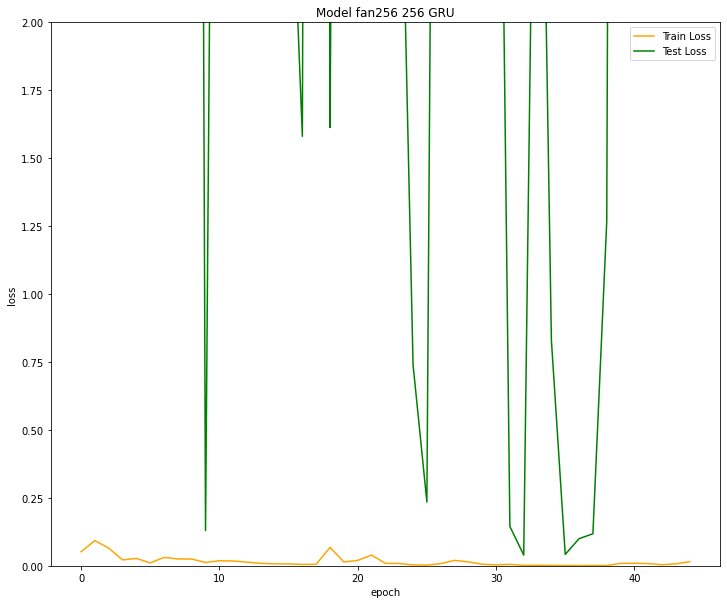

In [25]:
#plot de l'entrainement
plt.figure(figsize=(12,10))
plt.plot(history_Classificateur_GRU64.history['loss'][5:],'orange' ,label = 'Train Loss',)
plt.plot(history_Classificateur_GRU64.history['val_loss'][5:],'g', label = 'Test Loss')
plt.title('Model ' + machine+ str(dt) +" " + str(freq) +' GRU')
plt.ylim((0,2))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend();

In [26]:
y_pred_ID = Classificateur_GRU64.predict(X_test)
y_pred_ID = y_pred_ID.argmax(axis=1)

# Affichage des resultats

299 erreurs sur la classe normal soit 74.75 %  
1116 erreurs sur la classe anomaly soit 75.66 %  
détails fichiers normaux
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.25      1.00      0.40       100
           2       0.00      0.00      0.00       100
           3       1.00      0.01      0.02       100

    accuracy                           0.25       400
   macro avg       0.31      0.25      0.11       400
weighted avg       0.31      0.25      0.11       400

détails fichiers anomaly
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       407
           1       0.24      1.00      0.39       359
           2       0.00      0.00      0.00       348
           3       0.00      0.00      0.00       361

    accuracy                           0.24      1475
   macro avg       0.06      0.25      0.10      1475
weighted avg       0.06      0.24    

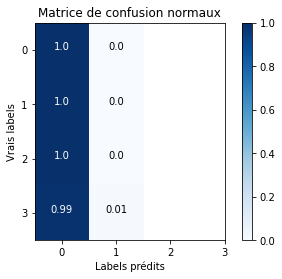

<Figure size 720x720 with 0 Axes>

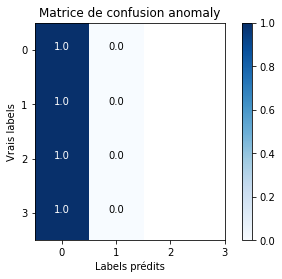

In [49]:
import itertools
err_normal = 0
err_anomaly = 0
for i in range(len(y_test_ID)):
    if (y_pred_ID[i] != y_test_ID[i]):
        if y_test_son[i] == 'normal':
           err_normal += 1  
        else:
           err_anomaly += 1
        
#print('nombre erreurs total: ', nbr_erreurs_total)
print('{} erreurs sur la classe normal soit {:.2f} %  '.format(err_normal, 100*err_normal/y_test_son[y_test_son=='normal'].shape[0]))
print('{} erreurs sur la classe anomaly soit {:.2f} %  '.format(err_anomaly, 100*err_anomaly/y_test_son[y_test_son=='anomaly'].shape[0]))

#résultats sur les fichiers normaux
print('détails fichiers normaux')
print(metrics.classification_report(y_test_ID[y_test_son=='normal'], y_pred_ID[y_test_son=='normal']))
crosstab=pd.crosstab(y_test_ID[y_test_son=='normal'], y_pred_ID[y_test_son=='normal'], rownames=['Classe réelle'], colnames=['Classe prédite'],normalize='index')

plt.figure()
plt.imshow(crosstab, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion normaux")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_train_ID)))
plt.xticks(tick_marks, np.unique(y_train_ID))
plt.yticks(tick_marks, np.unique(y_train_ID))

for i, j in itertools.product(range(crosstab.shape[0]), range(crosstab.shape[1])):
    plt.text(j, i, np.round(crosstab.iloc[i, j],2),
             horizontalalignment="center",
             color="white" if crosstab.iloc[i, j] > ( np.array(crosstab).max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')


#résultats sur les fichiers anomaly
print('détails fichiers anomaly')
print(metrics.classification_report(y_test_ID[y_test_son=='anomaly'], y_pred_ID[y_test_son=='anomaly']))
crosstab=pd.crosstab(y_test_ID[y_test_son=='anomaly'], y_pred_ID[y_test_son=='anomaly'], rownames=['Classe réelle'], colnames=['Classe prédite'],normalize='index')
plt.figure(figsize=(10,10))

plt.figure()
plt.imshow(crosstab, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion anomaly")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_train_ID)))
plt.xticks(tick_marks, np.unique(y_train_ID))
plt.yticks(tick_marks, np.unique(y_train_ID))

for i, j in itertools.product(range(crosstab.shape[0]), range(crosstab.shape[1])):
    plt.text(j, i, np.round(crosstab.iloc[i, j],2),
             horizontalalignment="center",
             color="white" if crosstab.iloc[i, j] > ( np.array(crosstab).max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits');


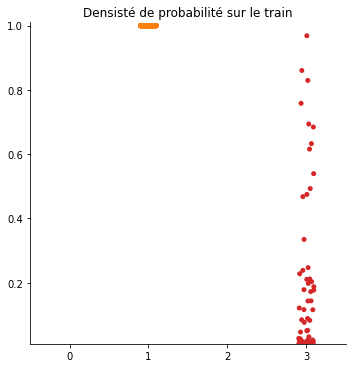

In [47]:
y_proba_train=Classificateur_GRU64.predict(X_train)
y_train_dum=pd.get_dummies(y_train_ID)
y_proba_train=y_proba_train*y_train_dum
sns.catplot(data=y_proba_train)
plt.title("Densisté de probabilité sur le train")
plt.ylim((0.01,1.01));

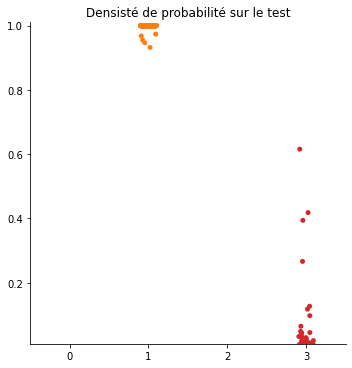

In [48]:
#sur le test
y_proba_test=Classificateur_GRU64.predict(X_test)
y_test_dum=pd.get_dummies(y_test_ID)
y_proba_test=y_proba_test*y_test_dum
sns.catplot(data=y_proba_test)
plt.title("Densisté de probabilité sur le test")
plt.ylim((0.01,1.01));

In [ ]:
#seuil par ID
seuil_ID=np.array([0.4,0.95,0.95,0.95])
classes=['normal','anomaly']
y_seuil=y_test_dum*seuil_ID
y_desc=np.array(y_proba_test-y_seuil).sum(axis=1)
y_desc=np.where(y_desc<0,'anomaly','normal')

score AUC 50.40 %


<Figure size 720x720 with 0 Axes>

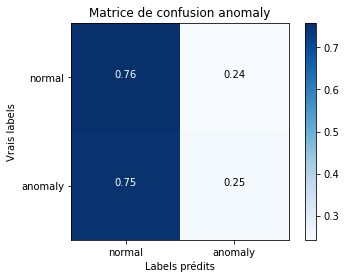

In [55]:
#calcul de l'AUC
fpr, tpr, thresholds = metrics.roc_curve(pd.DataFrame(y_test_son).replace(['normal','anomaly'],[normal_val,anomaly_val]), pd.DataFrame(y_desc).replace(['normal','anomaly'],[normal_val,anomaly_val]))
print('score AUC {:0.2f} %'.format(metrics.auc(fpr, tpr)*100))
#affichage de la crosstab
crosstab=pd.crosstab(y_test_son, y_desc, rownames=['Classe réelle'], colnames=['Classe prédite'],normalize='index')

plt.figure(figsize=(10,10))

plt.figure()
plt.imshow(crosstab, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion anomaly")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(crosstab.shape[0]), range(crosstab.shape[1])):
    plt.text(j, i, np.round(np.array(crosstab)[i, j],2),
             horizontalalignment="center",
             color="white" if np.array(crosstab)[i, j] > ( np.array(crosstab).max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits');